## Solving mass balance differential equations for an isothermal plug flow reactor using the Runge-Kutta method

We have the following reaction,<br />
<center>$A + B ----> C + D$</center> 

By Langmuir-Hinschelwood kinetics,
<center>${r_a}=k*C_A*C_B$</center> 

we can say,
<center>$\frac{Q_o*dC_A}{dV}=-\frac{k*C_A*C_B}{(1+K_A*C_A*C_B)^2}$</center>
<center>$\frac{Q_o*dC_B}{dV}=-\frac{k*C_A*C_B}{(1+K_A*C_A*C_B)^2}$</center>

Concentration at $V_{n+1}=V_n+dV $,
<center>${C_{An+1}}=C_{An}+\frac{(k_1*2k_2*2k_3*k_4)*dV}{6}$</center>
<br />
<center>${C_{Bn+1}}=C_{Bn}+\frac{(k_1*2k_2*2k_3*k_4)*dV}{6}$</center>
<br />

Where,
<center>${k_1}=\frac{-k*C_{An}*C_{Bn}}{(1+K_A*C_{An}*C_{Bn})^2*Q_o}$</center>
<br />
<center>${k_2}=\frac{-k*(C_{An}+\frac{k_1*dV}{2})*(C_{Bn}+\frac{k_1*dV}{2})}{(1+K_A*(C_{An}+\frac{k_1*dV}{2})*(C_{Bn}+\frac{k_1*dV}{2}))^2*Q_o}$</center>
<br />
<center>${k_3}=\frac{-k*(C_{An}+\frac{k_2*dV}{2})*(C_{Bn}+\frac{k_2*dV}{2})}{(1+K_A*(C_{An}+\frac{k_2*dV}{2})*(C_{Bn}+\frac{k_2*dV}{2}))^2*Q_o}$</center>
<br />
<center>${k_4}=\frac{-k*(C_{An}+k_3*dV)*(C_{Bn}+k_3*dV)}{(1+K_A*(C_{An}+k_3*dV)+K_B*(C_{Bn}+k_3*dV))^2*Q_o}$</center>

In [131]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.graph_objects as go
init_notebook_mode(connected=True)
cf.go_offline()

In [132]:
#Variables                 #Units            #Description

P= 2.0                     #bar              #Pressure
T= 450                     #K                #Temperature
R= 8.2057 *10**-5          #m3.atm/K.mol     #Gas constant
Rg= R*1.013                #cm3.bar/K.µmol   #Gas constant
Xa0=.4                                       #Initial mol fraction of A
Ca0= P*Xa0/(Rg*T)          #µmol/cm3         #Initial conc of A
Cb0= P*(1-Xa0)/(Rg*T)      #µmol/cm3         #Initial conc of B
Ka=0.1                     #cm3/µmol
Kb=0.2                     #cm3/µmol
k=.25                      #cm3/(µmol s)     #Reaction constant
Q0= 1.0                    #cm3/s            #volumetric flowrate

dV=0.005                  #cm3               #Step increase in volume
V=20                      #cm3               #Total volume of plug flow reactor

In [134]:
Ca=[Ca0] #list of concentrations of A at every incremental change in Volume
Cb=[Cb0] #list of concentrations of B at every incremental change in Volume

vol=np.arange(0,V+dV,dV) 

for i in range(len(vol)-1):
    k1=(-k*Ca[i]*Cb[i])/(Q0*(1+Ka*Ca[i]+Kb*Cb[i])**2)
    k2=(-k*(Ca[i]+(k1*dV/2))*((Cb[i])+(k1*dV/2)))/(Q0*(1+Ka*(Ca[i]+(k1*dV/2))+Kb*(Cb[i]+(k1*dV/2)))**2)
    k3=(-k*(Ca[i]+(k2*dV/2))*((Cb[i])+(k2*dV/2)))/(Q0*(1+Ka*(Ca[i]+(k2*dV/2))+Kb*(Cb[i]+(k2*dV/2)))**2)
    k4=(-k*(Ca[i]+(k3*dV))*(Cb[i]+(k3*dV)))/(Q0*(1+Ka*(Ca[i]+(k3*dV))+(Kb*(Cb[i]+(k3*dV))))**2)
    
    cona=Ca[i]+((k1+2*k2+2*k3+k4)*dV/6)
    conb=Cb[i]+((k1+2*k2+2*k3+k4)*dV/6)
    Ca.append(cona)
    Cb.append(conb)
print(f'The outlet concentration of A is {round(Ca[-1],2)} µmol/cm3 and that of B is {round(Cb[-1],2)} µmol/cm3')

The outlet concentration of A is 0.71 µmol/cm3 and that of B is 11.4µmol/cm3


In [136]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Ca, y=vol,
                    mode='lines',
                    name='Conc. of A'))
fig.add_trace(go.Scatter(x=Cb, y=vol,
                    mode='lines',
                    name='Conc. of B'))
fig.show()

Text(0.5, 1.0, 'Conc. Vs Vol.')

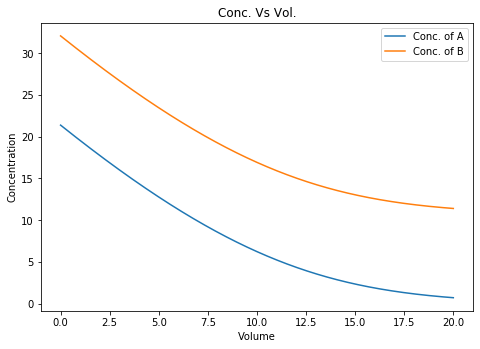

In [137]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(vol, Ca, label="Conc. of A")
ax.plot(vol, Cb, label="Conc. of B")
ax.legend()
plt.xlabel('Volume')
plt.ylabel('Concentration')
plt.title('Conc. Vs Vol.')

In [113]:
df=pd.DataFrame({'Ca':Ca, 'Cb':Cb, 'V':vol})
df

,Ca,Cb,V
0,21.387124,32.080686,0.000
1,21.377731,32.071293,0.005
2,21.368339,32.061901,0.010
3,21.358948,32.052510,0.015
4,21.349558,32.043120,0.020
...,...,...,...
3996,0.711885,11.405447,19.980
3997,0.710982,11.404545,19.985
3998,0.710081,11.403643,19.990
3999,0.709181,11.402743,19.995


### Thank you!